Build a regression model.

In [17]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
## csv file

flights_df = pd.read_csv('../data/flights_clean.csv')
flights_df.head()

,ID,Origin,Destination,Origin_City,Origin_State,Destination_City,Destination_State,Passengers,Seats,Flights,Distance,Fly_Date,Origin_Population,Destination_Population
0,AberdeenHuron00200807,ABR,HON,Aberdeen,SD,Huron,SD,0,0,1,74,200807,38991,15946
1,AberdeenHuron2757200611,ABR,HON,Aberdeen,SD,Huron,SD,27,57,3,74,200611,38886,15501
2,AberdeenHuron3051170200702,ABR,HON,Aberdeen,SD,Huron,SD,305,1170,39,74,200702,39026,15760
3,AberdeenHuron3076200704,ABR,HON,Aberdeen,SD,Huron,SD,30,76,4,74,200704,39026,15760
4,AberdeenHuron3121170200706,ABR,HON,Aberdeen,SD,Huron,SD,312,1170,39,74,200706,39026,15760


In [8]:
flights_df['ID'].nunique()

552290

ValueError: Could not interpret input 'flight'

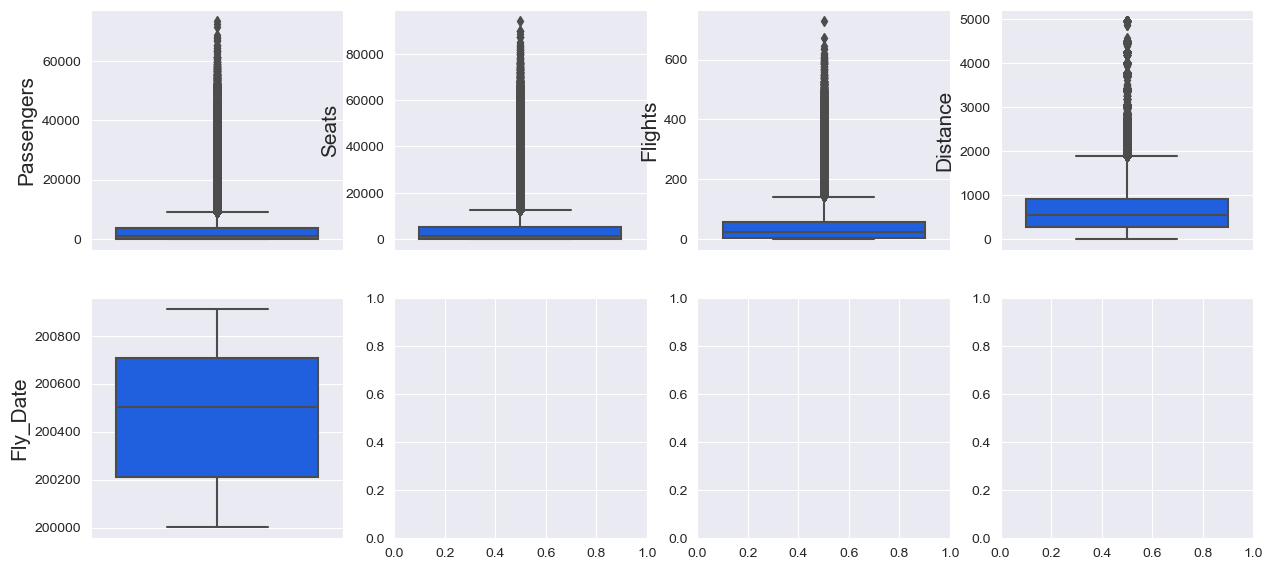

In [9]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

flightdata = np.concatenate([flights_df.select_dtypes(exclude='object').columns.values,  flights_df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(flightdata):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=flights_df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=flights_df, x=col, y='flight', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

C:\Users\sarab\AppData\Local\Temp\ipykernel_19512\2459439911.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(pd.concat([flights_df.drop(target,axis=1), flights_df[target]],axis=1).corr(), annot=True, cmap=cmap)


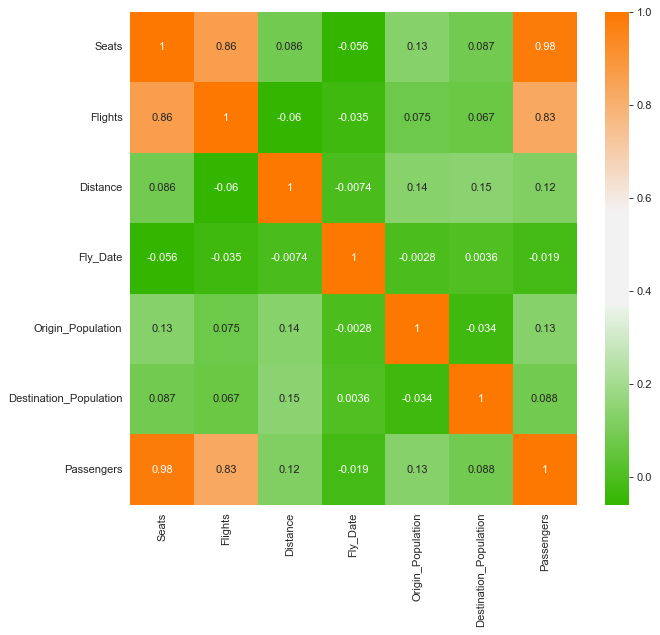

In [26]:
target = 'Passengers'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([flights_df.drop(target,axis=1), flights_df[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

In [33]:
X = flights_df.drop('Passengers', axis=1)
y = flights_df['Passengers']

#### Regression model

In [18]:
# Predicting 'Passengers' as the target variable and using 'Seats' and 'Flights' as features
X = flights_df[['Seats', 'Flights']]  # Feature(s)
y = flights_df['Passengers']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model, which includes p-values, adjusted R-squared, and F-statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          7.861e+06
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                        0.00
Time:                        02:03:59   Log-Likelihood:                     -3.8542e+06
No. Observations:              464850   AIC:                                  7.708e+06
Df Residuals:                  464848   BIC:                                  7.708e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In this case, both 'Seats' and 'Flights' have very low p-values (close to zero), indicating that they are statistically significant predictors.

Overall, the model explains a substantial portion of the variance in 'Passengers,' and both 'Seats' and 'Flights' are statistically significant predictors. However, some aspects of model fit and distribution of residuals may need further investigation, particularly the non-normality of residuals indicated by the Jarque-Bera test.

#### Classification Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the threshold for binary classification
threshold = 100  # You can adjust this threshold based on your problem

# Features: 'Seats' and 'Flights'
X = flights_df[['Seats', 'Flights']]
y = (flights_df['Passengers'] > threshold).astype(int)  # Create a binary target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (Logistic Regression)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9332002443788561
Confusion Matrix:
 [[28054  2480]
 [ 5283 80396]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     30534
           1       0.97      0.94      0.95     85679

    accuracy                           0.93    116213
   macro avg       0.91      0.93      0.92    116213
weighted avg       0.94      0.93      0.93    116213




The classification model has a high accuracy of approximately 93.32%. It performs well in precision, recall, and F1-score for both classes, indicating that it can effectively distinguish between them (0 and 1). The classification report provides a detailed breakdown of the model's performance for each class.

In [28]:
flights_df.isnull().sum()

ID                        0
Origin                    0
Destination               0
Origin_City               0
Origin_State              0
Destination_City          0
Destination_State         0
Passengers                0
Seats                     0
Flights                   0
Distance                  0
Fly_Date                  0
Origin_Population         0
Destination_Population    0
dtype: int64

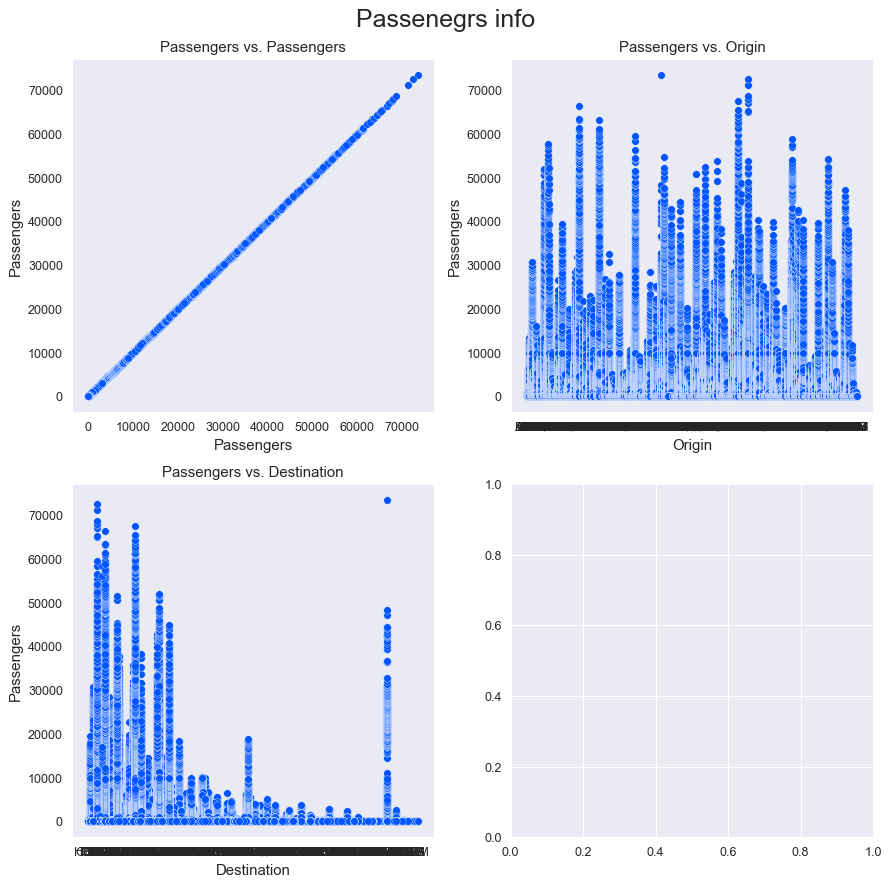

In [16]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Passengers', 'Origin', 'Destination']
target = 'Passengers'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(flights_df[num_features[i]], flights_df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Passenegrs info', size = 20)
plt.tight_layout()
plt.show()